In [1]:
#Step 1
#Date Processing 
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Directory containing the meteorological data files
meteo_dir = "Meteo"
# Directory containing the electrical load data files
eload_dir = "Eload"

# List to store combined data for each city
city_combined_data = []

# Iterate over each file in the meteorological data directory
for meteo_file in os.listdir(meteo_dir):
    if meteo_file.endswith(".csv"):
        # Extract city name from the file name
        city_name = os.path.splitext(meteo_file)[0]
        
        # Read meteorological data
        meteo_df = pd.read_csv(os.path.join(meteo_dir, meteo_file), skiprows=2)
        
        # Find the column positions based on feature names
        column_positions = {}
        for col_name in ["Dew Point", "DHI", "DNI", "GHI", "Surface Albedo", "Pressure", "Temperature", "Wind Direction", "Wind Speed"]:
            for i, col in enumerate(meteo_df.columns):
                if col_name.lower() in col.lower():
                    column_positions[col_name] = i
                    break
        
        # Extract relevant columns based on selected features
        selected_features = ["Dew Point", "DHI", "DNI", "GHI", "Surface Albedo", "Pressure", "Temperature", "Wind Direction", "Wind Speed"]  # Change this list to include desired features
        selected_columns = [column_positions[feature] for feature in selected_features]
        meteo_df = meteo_df.iloc[:, selected_columns]
        meteo_df.columns = selected_features
        
        # Read electrical load data
        eload_df = pd.read_csv(os.path.join(eload_dir, meteo_file), skiprows=1, usecols=[1], names=["Electricity Load (kW)"])
        
        # Combine meteorological and electrical load data
        combined_df = pd.concat([meteo_df, eload_df], axis=1)
        
        # Append combined data to the list
        city_combined_data.append(combined_df)

# Concatenate all city-wise data into a single DataFrame
combined_data = pd.concat(city_combined_data, ignore_index=True)

# Separate input features (X) and target values (y)
X = combined_data.iloc[:, :-1]  # Input features (meteorological data)
y = combined_data.iloc[:, -1]   # Target values (electrical load data)

# Normalize input features (X) using Min-Max scaling
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)

# Normalize target values (y) using Min-Max scaling
scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Create DataFrames for normalized features and target values
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
y_normalized_df = pd.DataFrame(y_normalized, columns=["Electricity Load (kW)"])

# Concatenate normalized features and target values into a single DataFrame
normalized_combined_data = pd.concat([X_normalized_df, y_normalized_df], axis=1)

i:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
i:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
i:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
i:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

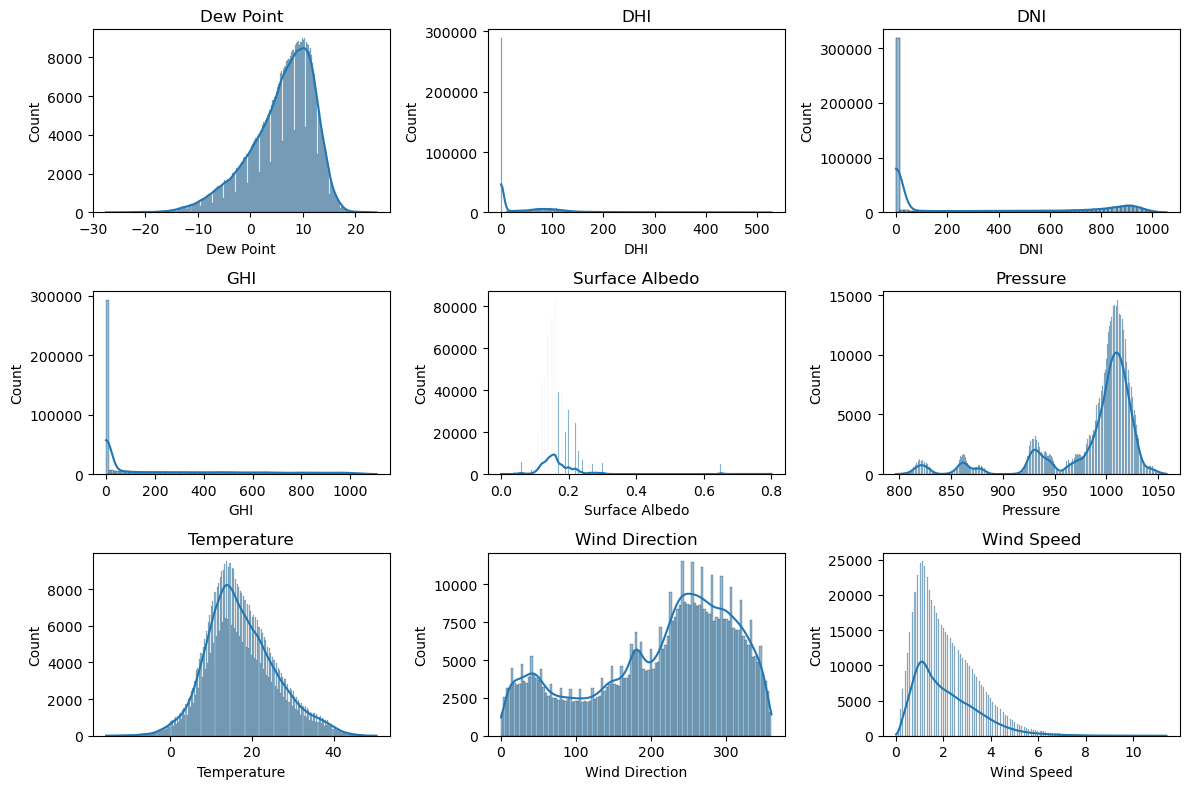

i:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


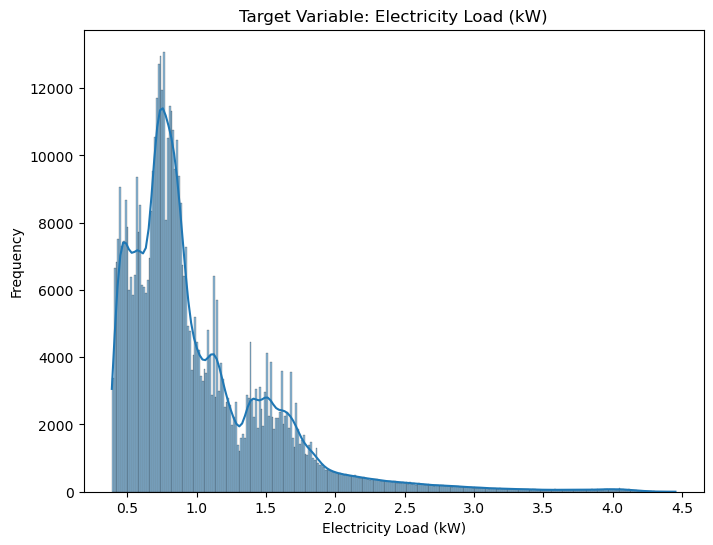

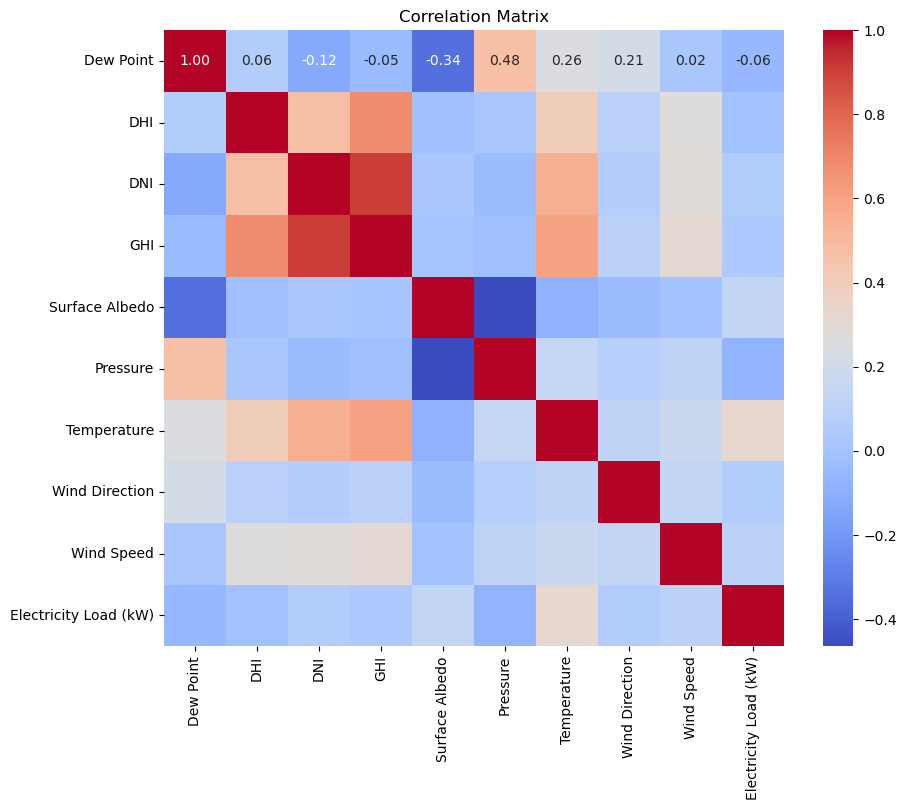

In [58]:
# Step 2
# Parameters distribution and Correlation 
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of key features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(X[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Visualize distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Target Variable: Electricity Load (kW)')
plt.xlabel('Electricity Load (kW)')
plt.ylabel('Frequency')
plt.show()

# Calculate correlation matrix
corr_matrix = normalized_combined_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Saving the DataFrame
output_file = "combined_data.csv"

# Save the DataFrame to a CSV file
normalized_combined_data.to_csv(output_file, index=False)

print("DataFrame saved to:", output_file)

Epoch 1/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 60s 8ms/step - loss: 0.0814 - val_loss: 0.0128
Epoch 2/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - loss: 0.0148 - val_loss: 0.0115
Epoch 3/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 54s 9ms/step - loss: 0.0144 - val_loss: 0.0113
Epoch 4/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 54s 9ms/step - loss: 0.0141 - val_loss: 0.0113
Epoch 5/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - loss: 0.0139 - val_loss: 0.0113
Epoch 6/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - loss: 0.0140 - val_loss: 0.0114
Epoch 7/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - loss: 0.0139 - val_loss: 0.0112
Epoch 8/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - loss: 0.0138 - val_loss: 0.0112
Epoch 9/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - loss: 0.0138 - val_loss: 0.0111
Epoch 10/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - loss: 0.0137 - val_loss: 0.0110
Epoch 11/50
6324/6324 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - loss: 0.0137 - val_loss: 0.0109
Epoch 12/50
6324/63

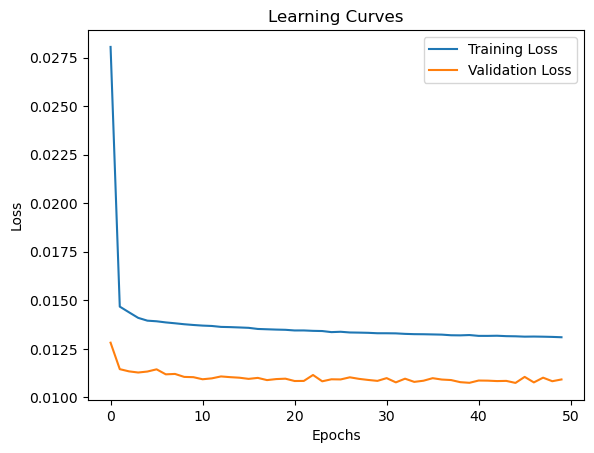

In [37]:
# Step 3 
# RNN model training 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.regularizers import l1

# Split the sequential dataset for validation without shuffling
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y_normalized, test_size=0.3, shuffle=False)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Build the LSTM model
model = Sequential([
    LSTM(units=250, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),  # Add dropout layer to prevent overfitting
    LSTM(units=150, activation='relu', return_sequences=True),
    Dropout(0.2),  # Add dropout layer to prevent overfitting
    Dense(units=128, activation='linear', kernel_regularizer=l1(0.001)),  # Add L1 regularization
    Dense(units=1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_val_reshaped, y_val))

# Plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [38]:
# Step 4 
# Load the trained model
model.save('rnn_lstm_model2.h5')

In [39]:
# Step 5 
# Using the trained model for generating Eload for a unseen City
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('rnn_lstm_model2.h5')

# Load the new meteorological data
new_meteo_data = pd.read_csv('new_meteorological_data.csv', skiprows=2)

# Extract feature names from the new meteorological data
feature_names = ["Dew Point", "DHI", "DNI", "GHI", "Surface Albedo", "Pressure", "Temperature", "Wind Direction", "Wind Speed"]

# Extract relevant columns based on feature names
new_X = new_meteo_data[feature_names]

# Normalize the new meteorological data using the same scaler used during training
new_X_scaled = scaler_X.transform(new_X)

# Reshape the input data for the LSTM model
new_X_reshaped = np.reshape(new_X_scaled, (new_X_scaled.shape[0], 1, new_X_scaled.shape[1]))

# Make predictions using the loaded model
predictions_normalized = loaded_model.predict(new_X_reshaped)

# Reshape predictions to remove the extra dimension
predictions_normalized = predictions_normalized.reshape(-1, 1)

# Inverse transform the normalized predictions to get the actual electrical load values
predictions = scaler_y.inverse_transform(predictions_normalized)

# Flatten the predictions array to get a vector of 8760 values
predictions_flat = predictions.flatten()

# Print the predicted hourly electrical load
print(predictions_flat)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0.84973705 0.8210633  0.7859385  ... 0.90175784 0.8830148  0.8739502 ]


Epoch 1/5


C:\Users\alisa\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14454/14454 ━━━━━━━━━━━━━━━━━━━━ 61s 4ms/step - loss: 0.3055 - val_loss: 0.2821
Epoch 2/5
14454/14454 ━━━━━━━━━━━━━━━━━━━━ 60s 4ms/step - loss: 0.2785 - val_loss: 0.2748
Epoch 3/5
14454/14454 ━━━━━━━━━━━━━━━━━━━━ 59s 4ms/step - loss: 0.2719 - val_loss: 0.2711
Epoch 4/5
14454/14454 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 0.2682 - val_loss: 0.2708
Epoch 5/5
14454/14454 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - loss: 0.2667 - val_loss: 0.2675
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2650
Test Loss: 0.26617857813835144


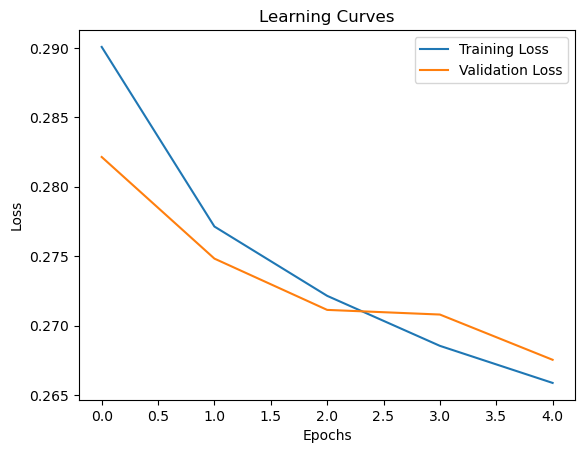

In [129]:
# Step 6
# Future Research
# GRU
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape input data for GRU
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the GRU model
model = Sequential([
    GRU(units=150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(units=150, activation='relu', return_sequences=True),
    Dense(units=1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot learning curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [130]:
# Load the trained model
model.save('GRU_model.h5')

In [131]:
import pandas as pd
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('GRU_model.h5')

# Load the new meteorological data
new_meteo_data = pd.read_csv('new_meteorological_data.csv', skiprows=2)

# Extract feature names from the new meteorological data
feature_names = ["Dew Point", "DHI", "DNI", "GHI", "Surface Albedo", "Pressure", "Temperature", "Wind Direction", "Wind Speed"]

# Extract relevant columns based on feature names
new_X = new_meteo_data[feature_names]

# Preprocess the new meteorological data
new_X_scaled = scaler.transform(new_X)
new_X_reshaped = np.reshape(new_X_scaled, (new_X_scaled.shape[0], 1, new_X_scaled.shape[1]))

# Make predictions using the loaded model
predictions = loaded_model.predict(new_X_reshaped)

# Flatten the predictions array to get a vector of 8760 values
predictions_flat = predictions.flatten()

# Print the predicted hourly electrical load
print(predictions_flat)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0.62054193 0.62177175 0.6217483  ... 0.57439816 0.58984816 0.6081567 ]


In [ ]:
# Step 6
# Future Research
# Random Forest Regressor

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

# Define a range of training set sizes
train_sizes = np.arange(100, len(X_train), 1000)

# Train the model on different subsets of the training data and compute errors
for size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf.fit(X_train_subset, y_train_subset)
    
    y_pred_train = model_rf.predict(X_train_subset)
    train_errors.append(mean_absolute_error(y_train_subset, y_pred_train))
    
    y_pred_val = model_rf.predict(X_val)
    val_errors.append(mean_absolute_error(y_val, y_pred_val))

# Plot learning curves
plt.plot(train_sizes, train_errors, label='Training MAE')
plt.plot(train_sizes, val_errors, label='Validation MAE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [109]:
from joblib import load

# Load the saved Random Forest model
loaded_model_rf = load('random_forest_model.joblib')

In [108]:
from joblib import dump

dump(model_rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [126]:
# Save the predicted electrical load to a CSV file
np.savetxt('predicted_electrical_load.csv', predictions_flat, delimiter=',', header='Electricity Load (kW)', comments='')

In [117]:
# Load the new meteorological data
new_meteo_data = pd.read_csv('new_meteorological_data.csv', skiprows=2)

# Extract feature names from the new meteorological data
feature_names = ["Dew Point", "DHI", "DNI", "GHI", "Surface Albedo", "Pressure", "Temperature", "Wind Direction", "Wind Speed"]

# Extract relevant columns based on feature names
new_X = new_meteo_data[feature_names]

# Standardize the features using the same scaler object used during training
new_X_scaled = scaler.transform(new_X)

# Make predictions using the loaded model
predictions = loaded_model_rf.predict(new_X_scaled)

# Print the predicted hourly electrical load
print(predictions)

[0.65072734 0.68597082 0.68424623 ... 0.84258606 0.65899237 0.65535745]


In [8]:
# Step 6
# Future Research
# GAN

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset, SequentialSampler

# Define the generator network
class Generator(nn.Module):
    def __init__(self, latent_dim, feature_dim, output_dim):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.feature_dim = feature_dim
        self.output_dim = output_dim
        
        self.model = nn.Sequential(
            nn.Linear(self.latent_dim + self.feature_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, self.output_dim),
            nn.Tanh()
        )

    def forward(self, z, features):
        combined_input = torch.cat((z, features), dim=1)
        return self.model(combined_input)

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim, feature_dim):
        super(Discriminator, self).__init__()
        self.input_dim = input_dim
        self.feature_dim = feature_dim
        
        self.model = nn.Sequential(
            nn.Linear(self.input_dim + self.feature_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x, features):
        combined_input = torch.cat((x, features), dim=1)
        return self.model(combined_input)

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load your preprocessed dataset
# Assuming your preprocessed data is in the form of X_normalized_df (input features) and y_normalized_df (target values)
# Make sure to adjust the feature_dim and output_dim accordingly

# Convert the preprocessed data into PyTorch tensors
X_tensor = torch.tensor(X_normalized_df.values, dtype=torch.float32)
y_tensor = torch.tensor(y_normalized_df.values, dtype=torch.float32)

# Use SequentialSampler to maintain the sequential order of the dataset
sampler = SequentialSampler(dataset)

# Combine the input features and target values into a PyTorch dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Define hyperparameters
batch_size = 64
latent_dim = 100  # Latent dimension for generator input
feature_dim = X_normalized_df.shape[1]  # Number of features
output_dim = 1  # Output dimension for generator output and discriminator input
epochs = 2
lr = 0.0002

# Create a DataLoader for the dataset
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Initialize generator and discriminator networks
generator = Generator(latent_dim, feature_dim, output_dim)
discriminator = Discriminator(output_dim, feature_dim)

# Define optimizers for both networks
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Define loss function (binary cross entropy)
criterion = nn.BCELoss()

# Training loop
for epoch in range(epochs):
    for i, (features, target) in enumerate(data_loader):
        # Adjust batch size for the last batch
        batch_size = features.size(0)
        
        # Train discriminator with real data
        discriminator.zero_grad()
        real_data = target
        real_labels = torch.ones(batch_size, 1)
        real_outputs = discriminator(real_data, features)
        d_loss_real = criterion(real_outputs, real_labels)
        d_loss_real.backward()

        # Train discriminator with fake data generated by the generator
        z = torch.randn(batch_size, latent_dim)
        fake_data = generator(z, features)
        fake_labels = torch.zeros(batch_size, 1)
        fake_outputs = discriminator(fake_data.detach(), features)
        d_loss_fake = criterion(fake_outputs, fake_labels)
        d_loss_fake.backward()
        optimizer_D.step()

        # Train generator to fool the discriminator
        generator.zero_grad()
        fake_outputs = discriminator(fake_data, features)
        g_loss = criterion(fake_outputs, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch}/{epochs}], Batch [{i}/{len(data_loader)}], "
                  f"Discriminator Loss: {d_loss_real.item() + d_loss_fake.item()}, "
                  f"Generator Loss: {g_loss.item()}")

# Save trained generator
torch.save(generator.state_dict(), 'generator.pth')

Epoch [0/2], Batch [0/9034], Discriminator Loss: 1.3898715376853943, Generator Loss: 0.7071052193641663
Epoch [0/2], Batch [100/9034], Discriminator Loss: 1.3713465332984924, Generator Loss: 0.725386917591095
Epoch [0/2], Batch [200/9034], Discriminator Loss: 1.3596577048301697, Generator Loss: 0.8412877917289734
Epoch [0/2], Batch [300/9034], Discriminator Loss: 1.3781891465187073, Generator Loss: 0.7091562747955322
Epoch [0/2], Batch [400/9034], Discriminator Loss: 1.453326940536499, Generator Loss: 0.680142879486084
Epoch [0/2], Batch [500/9034], Discriminator Loss: 1.4371804594993591, Generator Loss: 0.6224581599235535
Epoch [0/2], Batch [600/9034], Discriminator Loss: 1.4187982082366943, Generator Loss: 0.704617440700531
Epoch [0/2], Batch [700/9034], Discriminator Loss: 1.377207636833191, Generator Loss: 0.6958291530609131
Epoch [0/2], Batch [800/9034], Discriminator Loss: 1.3793070316314697, Generator Loss: 0.7090007662773132
Epoch [0/2], Batch [900/9034], Discriminator Loss: 1.

Epoch [0/2], Batch [7700/9034], Discriminator Loss: 1.3775808811187744, Generator Loss: 0.7035308480262756
Epoch [0/2], Batch [7800/9034], Discriminator Loss: 1.3876307606697083, Generator Loss: 0.6967432498931885
Epoch [0/2], Batch [7900/9034], Discriminator Loss: 1.3974324464797974, Generator Loss: 0.6934656500816345
Epoch [0/2], Batch [8000/9034], Discriminator Loss: 1.3578423261642456, Generator Loss: 0.7584543824195862
Epoch [0/2], Batch [8100/9034], Discriminator Loss: 1.3699251413345337, Generator Loss: 0.6967052221298218
Epoch [0/2], Batch [8200/9034], Discriminator Loss: 1.3585870265960693, Generator Loss: 0.7445708513259888
Epoch [0/2], Batch [8300/9034], Discriminator Loss: 1.3752474188804626, Generator Loss: 0.694564700126648
Epoch [0/2], Batch [8400/9034], Discriminator Loss: 1.4774402379989624, Generator Loss: 0.6914838552474976
Epoch [0/2], Batch [8500/9034], Discriminator Loss: 1.314097285270691, Generator Loss: 0.7144033312797546
Epoch [0/2], Batch [8600/9034], Discrim

Epoch [1/2], Batch [6300/9034], Discriminator Loss: 1.362182855606079, Generator Loss: 0.7100561261177063
Epoch [1/2], Batch [6400/9034], Discriminator Loss: 1.40936678647995, Generator Loss: 0.6572002172470093
Epoch [1/2], Batch [6500/9034], Discriminator Loss: 1.3616429567337036, Generator Loss: 0.7024690508842468
Epoch [1/2], Batch [6600/9034], Discriminator Loss: 1.4549763202667236, Generator Loss: 0.6241202354431152
Epoch [1/2], Batch [6700/9034], Discriminator Loss: 1.3785255551338196, Generator Loss: 0.7167617082595825
Epoch [1/2], Batch [6800/9034], Discriminator Loss: 1.3685389161109924, Generator Loss: 0.7242917418479919
Epoch [1/2], Batch [6900/9034], Discriminator Loss: 1.424230694770813, Generator Loss: 0.6742326617240906
Epoch [1/2], Batch [7000/9034], Discriminator Loss: 1.3353776335716248, Generator Loss: 0.8594719767570496
Epoch [1/2], Batch [7100/9034], Discriminator Loss: 1.3936845660209656, Generator Loss: 0.686351478099823
Epoch [1/2], Batch [7200/9034], Discrimina

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

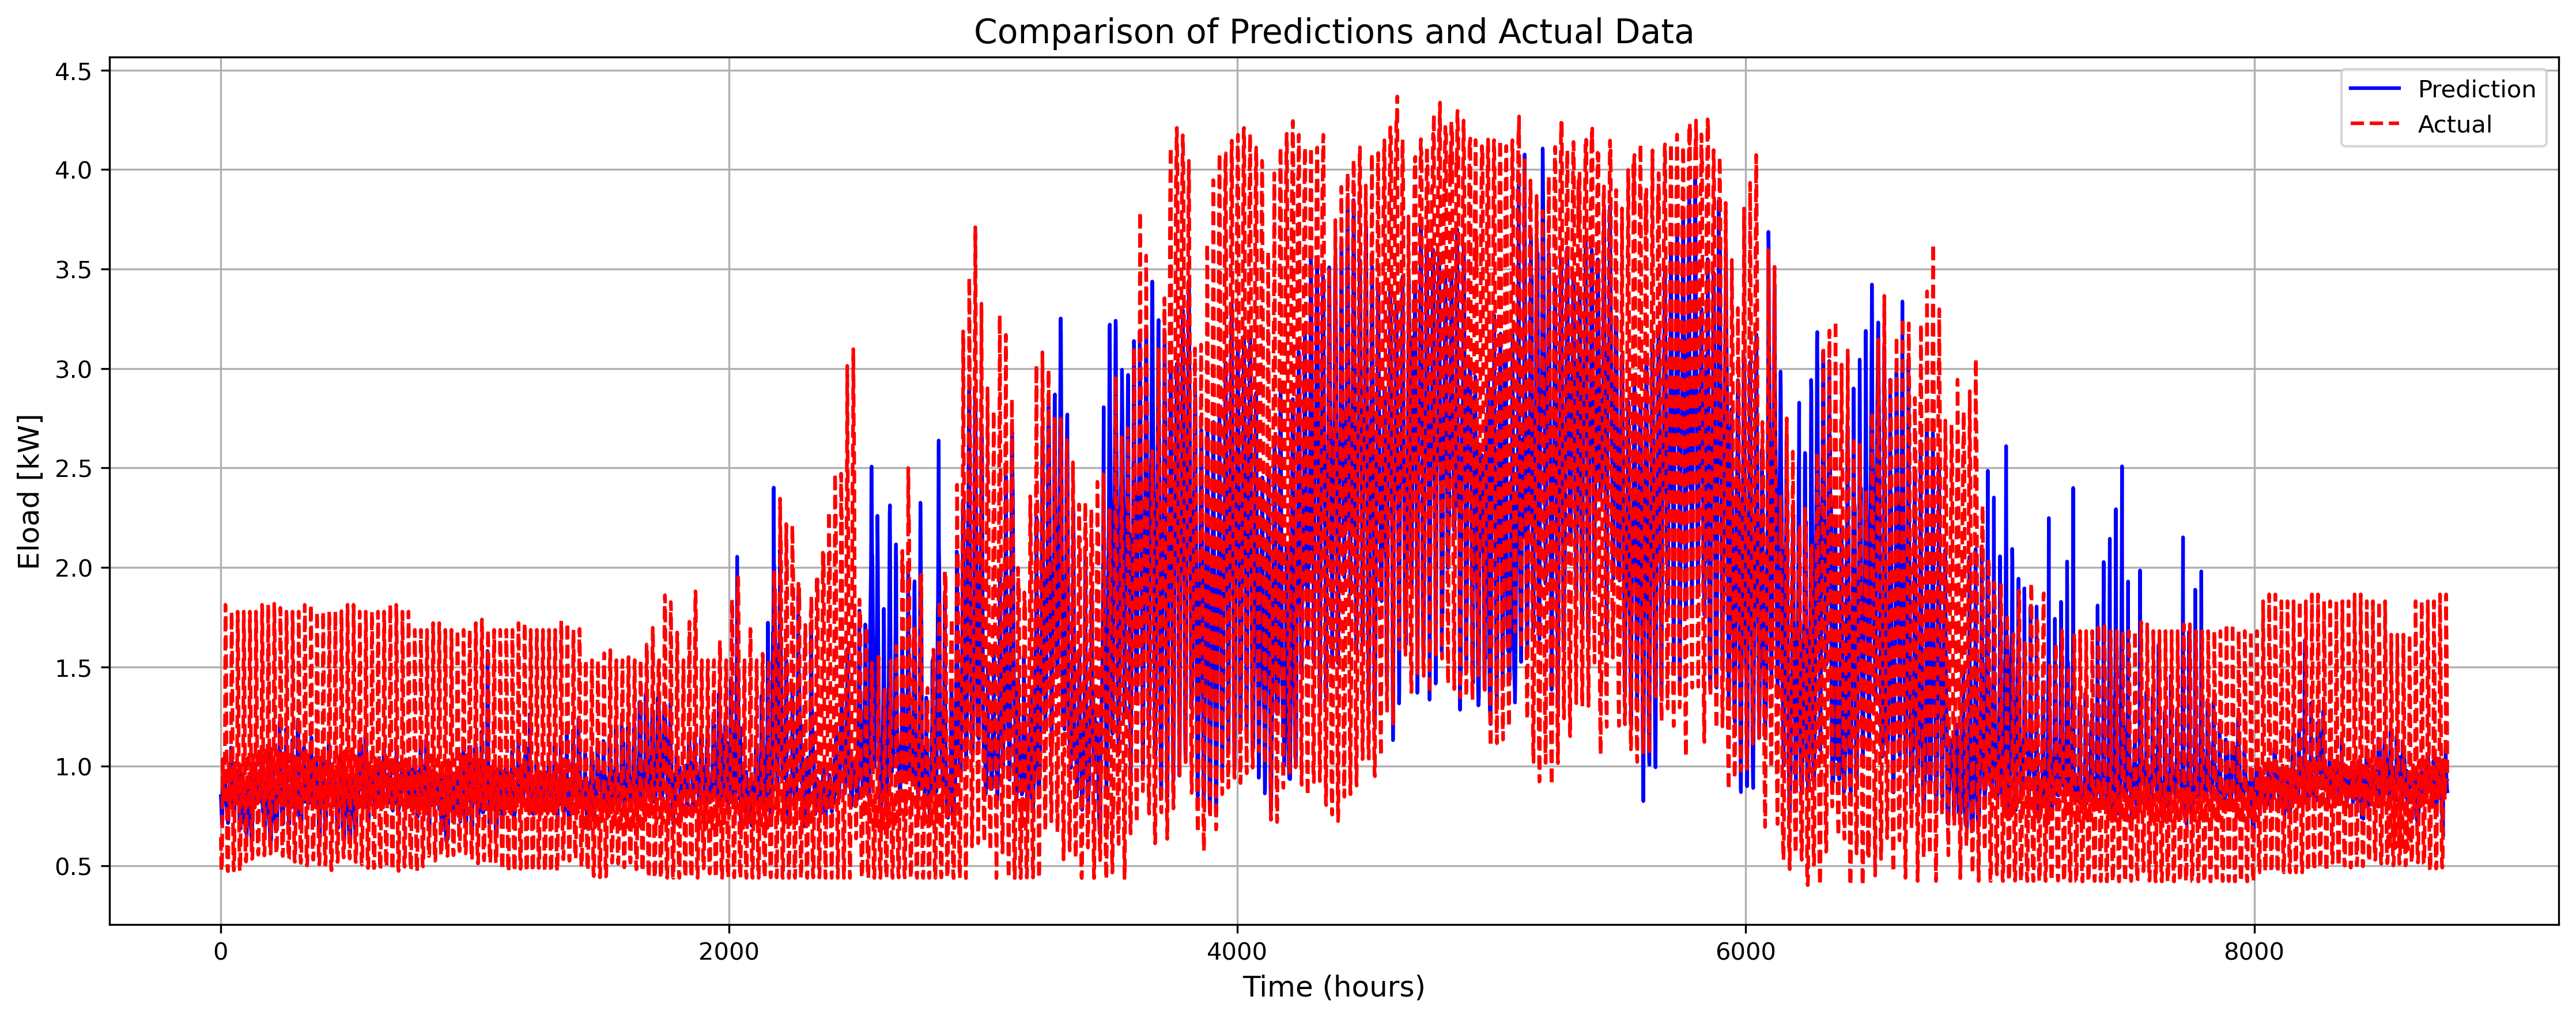

Mean Absolute Error: 0.4050720422641734


In [41]:
data = pd.read_csv('USA_Phoenix.csv', skiprows=1, usecols=[1], header=None)
values_from_csv = data.values  

x = np.arange(1, len(predictions_flat)+1)

# Plotting the comparison
plt.figure(figsize=(15, 6), dpi=300) 
plt.plot(x, predictions_flat, label='Prediction', linestyle='-', color='blue')
plt.plot(x, values_from_csv, label='Actual', linestyle='--', color='red')

plt.xlabel('Time (hours)', fontsize=12)  
plt.ylabel('Eload [kW]', fontsize=12)  
plt.title('Comparison of Predictions and Actual Data', fontsize=14)  
plt.legend(fontsize=10)  
plt.grid(True)
plt.tight_layout() 
plt.show()

from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(values_from_csv, predictions_flat)
print("Mean Absolute Error:", mae)

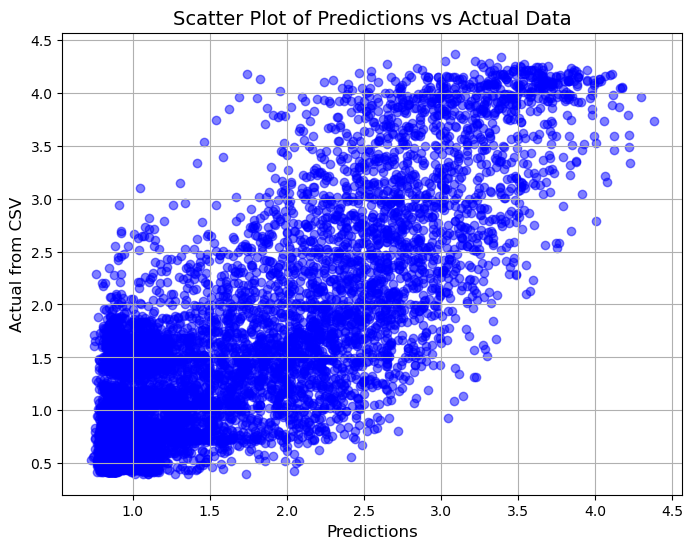

In [21]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))  
plt.scatter(predictions_flat, values_from_csv, color='blue', alpha=0.5) 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actual from CSV', fontsize=12)
plt.title('Scatter Plot of Predictions vs Actual Data', fontsize=14)
plt.grid(True)
plt.show()

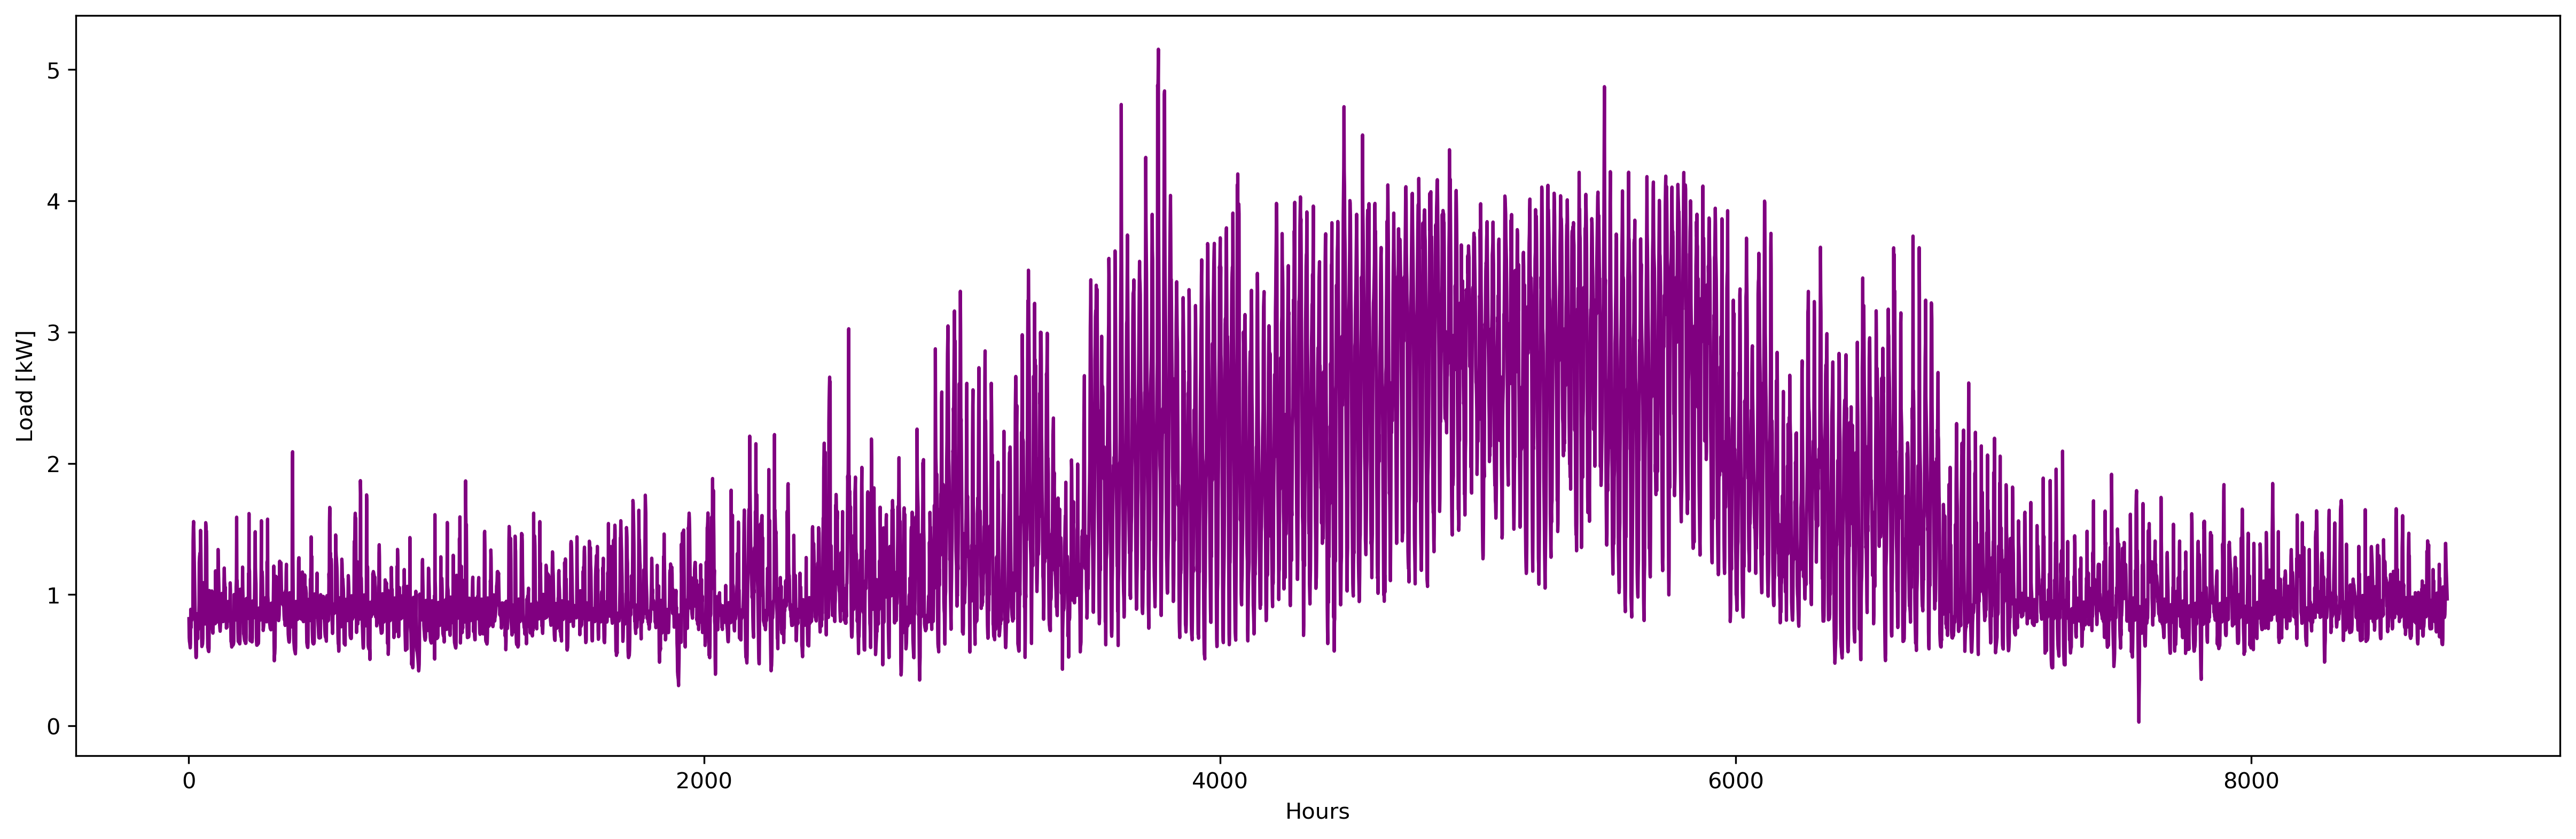

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generating the x values (hours)
x = np.arange(1, len(data)+1)

# Set figure size to create a long plot
plt.figure(figsize=(20, 6), dpi=300)  # Adjust length and DPI as needed

# Plotting the data
plt.plot(x, predictions_flat, color='purple')

# Adding labels and title
plt.xlabel('Hours')
plt.ylabel('Load [kW]')

# Display the plot
plt.show()